A partir de l’implémentation de l’estimation de phase (version basique) réalisée en cours ou en partant de celle-ci https://github.com/vivienlonde/BasicPhaseEstimation, étudiez à quelle vitesse l’erreur d’estimation |ϕˆ−ϕ| tend vers 0 lorsqu’on augmente :
* le nombre de répétitions du circuit (nombre de shots).
* la puissance n à laquelle on élève l’opération U dont on cherche à estimer l’une des valeurs propres. 

Vous pouvez tracer un ou plusieurs graphiques donnant l’erreur d’estimation |ϕˆ − ϕ| en fonction du nombre de shots (à n constant) et un ou plusieurs graphique donnant l’erreur d’estimation en fonction de n () nombre de shots constant).

In [1]:
import qsharp
import matplotlib.pyplot as plt
import numpy as np

# Set the root folder (need to overwrite it since we use a notebook)
root_dir = 'C:\\Users\\SOLER\\Desktop\\Travail\\S8\\Q#\\TD2\\DM\\BasicPhaseEstimation'

qsharp.init(project_root=root_dir)

Q# initialized with configuration: {'targetProfile': 'unrestricted', 'languageFeatures': None, 'manifest': '{}'}

### Test

In [2]:
n_shots = 10
phi= 0.0000000001
oracle_power = 1

result = qsharp.eval("PhaseEstimation.Run({}, {}, {})".format(n_shots, phi, oracle_power))

print(result)

(6, 4)


Ça marche, il faut maintenant faire les deux augmentations pour voir l'évolution.

In [3]:
# function to calculate the estimated phase using arcsin 
def Estimate(result):
    n_Zero, n_One = result
    n = n_Zero + n_One
    pb_One = (n_One/n)
    return 2*np.arctan2(np.sqrt(pb_One),np.sqrt(1-pb_One))/n


## Le nombre de répétitions du circuit (nombre de shots).

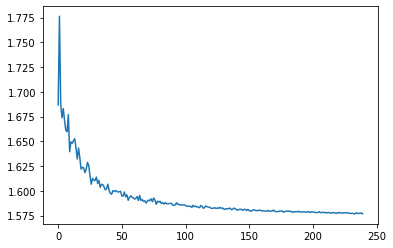

In [4]:
# List to gather the results
results = []

# With shot = 1 I have a (0,0) as result, making it impossible to get
for shots in range(10, 250):
    result = qsharp.eval("PhaseEstimation.Run({}, {}, {})".format(shots, phi, oracle_power))
    results.append(abs(Estimate(result) + (np.pi / (2 * oracle_power)) - phi))
    
plt.plot(results)
plt.show()

## La puissance n à laquelle on élève l’opération U dont on cherche à estimer l’une des valeurs propres.

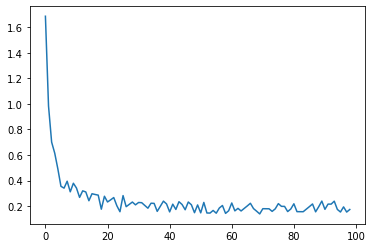

In [5]:
# List to gather the results
results = []

for power in range(1, 100):
    result = qsharp.eval("PhaseEstimation.Run({}, {}, {})".format(n_shots, phi, power))
    results.append(abs(Estimate(result) + (np.pi / (2 * power)) - phi))
    
plt.plot(results)
plt.show()  

## On constate que les deux graphs ressemble à une courbe $$1/\sqrt{n}$$

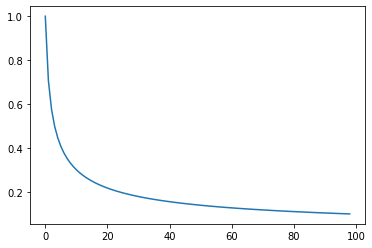

In [6]:
plt.plot(1/np.sqrt(np.arange(1,100)))
plt.show()